![](https://delftswa.gitbooks.io/desosa-2017/content/matplotlib/images-matplotlib/matplotlib.png)

- [**What is Matplotlib?**](#What-is-Matplotlib?)

- [**General Matplotlib Tips**](#General-Matplotlib-Tips) 

    -  [**Importing Matplotlib**](#Importing-Matplotlib)
    -  [**Setting Styles**](#Setting-Styles)
    -  [**How to Display Your Plots**](#How-to-Display-Your-Plots)
    -  [**Saving Figures to File**](#Saving-Figures-to-File)
     
- [**Two Interfaces for the Price of One**](#Two-Interfaces-for-the-Price-of-One)
- [**Multiple Subplots**](#Multiple-Subplots)

    - [**plt.axes: Subplots by Hand**](#plt.axes:-Subplots-by-Hand)
    - [**plt.subplot: Simple Grids of Subplots**](#plt.subplot:-Simple-Grid-of-Subplots)
    - [**plt.subplots: The Whole Grid in One Go**](#plt.subplots:-The-Whole-Grid-in-One-Go)
    
- [**Simple Line Plots**](#Simple-Line-Plots)

    - [**Adjusting the Plot: Axes Line Colors and Styles**](#Adjusting-the-Plot:-Axes-Line-Colors-and-Styles)
    - [**Adjusting the Plot: Axes Limits**](#Adjusting-the-Plot:-Axes-Limits)
    - [**Labeling Plots**](#Labeling-Plots)
    - [**Aside: Matplotlib Gotchas**](#Aside:-Matplotlib-Gotchas)

- [**Simple Scatter Plots**](#Simple-Scatter-Plots)

    - [**Scatter Plots with plt.plot**](#Scatter-Plots-with-plt.plot)
    - [**Scatter Plots with plt.scatter**](#Scatter-Plots-with-plt.scatter)
    
- [**Histograms**](#Histograms)


        

# What is Matplotlib?

We'll now take an in-depth look at the [Matplotlib](https://matplotlib.org/) **package for visualization in Python**.
Matplotlib is a **multi-platform** data visualization library built on **NumPy** arrays, and designed to work with the broader **SciPy** stack.
It was conceived by John Hunter in 2002, originally as a patch to IPython for enabling interactive MATLAB-style plotting via [gnuplot](http://www.gnuplot.info/) from the IPython command line.
IPython's creator, Fernando Perez, was at the time scrambling to finish his PhD, and let John know he wouldn’t have time to review the patch for several months.
John took this as a cue to set out on his own, and the Matplotlib package was born, with version 0.1 released in 2003.
It received an early boost when it was adopted as the plotting package of choice of the Space Telescope Science Institute (the folks behind the Hubble Telescope), which financially supported Matplotlib’s development and greatly expanded its capabilities.



In recent years, however, the interface and style of Matplotlib have begun to show their age.
Still, I'm of the opinion that we cannot ignore Matplotlib's strength as a well-tested, cross-platform graphics engine.
Recent Matplotlib versions make it relatively easy to set new global plotting styles (see [Customizing Matplotlib: Configurations and Style Sheets](04.11-Settings-and-Stylesheets.ipynb)), and people have been developing new packages that build on its powerful internals to drive Matplotlib via cleaner, more modern APIs—for example, **Seaborn** (discussed in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)), [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), and **even Pandas** itself can be used as wrappers around Matplotlib's API.
Even with wrappers like these, **it is still often useful to dive into Matplotlib's syntax to adjust the final plot output.**
For this reason, I believe that Matplotlib itself will remain a vital piece of the data visualization stack, even if new tools mean the community gradually moves away from using the Matplotlib API directly.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [7]:

import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic [styles](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [9]:
print(plt.style.available)
# Que estilos hay por defecto

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Throughout this section, we will adjust this style as needed.
Note that the stylesheets used here are supported as of Matplotlib version 1.5; if you are using an earlier version of Matplotlib, only the default style is available.
For more information on stylesheets, see [Customizing Matplotlib: Configurations and Style Sheets](https://matplotlib.org/3.3.1/tutorials/introductory/customizing.html).

### How to Display Your Plots
###### ``show()`` or No ``show()``? 

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, **the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.**

NOTA 
Cuando usemos .py para mostrar los graficos será necesario añadir al final del código plt.show()

#### Plotting from an IPython notebook

The IPython notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document.

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command, and works in a similar way to the IPython shell.
In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this book, we will generally opt for ``%matplotlib inline``:

In [10]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

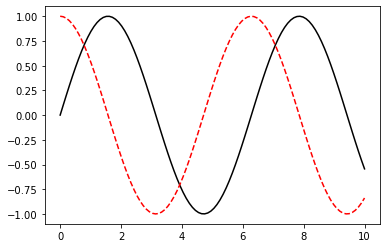

In [16]:
import numpy as np
x = np.linspace(0,10,100) #generating 100 linear values between 0-10

fig = plt.figure() #create figure
plt.plot(x,np.sin(x),"-k")
plt.plot(x,np.cos(x), "--r")

### Saving Figures to File

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats.
Saving a figure can be done using the ``savefig()`` command.
For example, to save the previous figure as a PNG file, you can run this:

In [17]:
fig.savefig("my_figure.png")
#("img/my_figure.png") saves it in the img folder in current working directory

We now have a file called ``my_figure.png`` in the current working directory:

To confirm that it contains what we think it contains, let's use the IPython ``Image`` object to display the contents of this file:

In [ ]:
from IPython.display()

In ``savefig()``, the file format is inferred from the extension of the given filename.


Note that when saving your figure, it's not necessary to use ``plt.show()`` or related commands.

## Two Interfaces for the Price of One

A potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. We'll quickly highlight the differences between the two here.

#### MATLAB-style Interface

**Matplotlib was originally written as a Python alternative for MATLAB users**, and much of its syntax reflects that fact.
The MATLAB-style tools are contained in the pyplot (``plt``) interface.
For example, the following code will probably look quite familiar to MATLAB users:

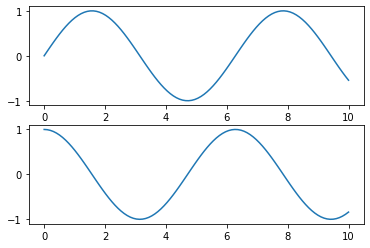

In [21]:
plt.figure()
plt.subplot(2,1,1) #rows, columns, which one I am accesing
plt.plot(x,np.sin(x))
plt.subplot(2,1,2) #rows, columns, which one I am accesing
plt.plot(x,np.cos(x))


It is important to note that this interface is *stateful*: it keeps track of the **"current" figure and axes, which are where all ``plt`` commands are applied.**
You can get a reference to these using the ``plt.gcf()`` (get current figure) and ``plt.gca()`` (get current axes) routines.

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems.
For example, once the second panel is created, how can we go back and add something to the first?
This is possible within the MATLAB-style interface, but a bit clunky.
Fortunately, there is a better way.

#### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure.
Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are *methods* of explicit ``Figure`` and ``Axes`` objects.
To re-create the previous plot using this style of plotting, you might do the following:

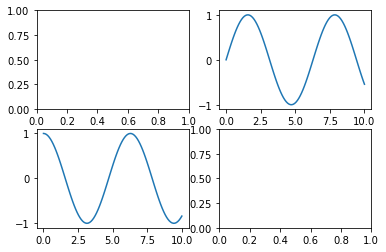

In [25]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2,2)
ax[0,1].plot(x,np.sin(x))
ax[1,0].plot(x,np.cos(x))

For more simple plots, the choice of which style to use is largely a **matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.**
Throughout this chapter, we will switch between the MATLAB-style and object-oriented interfaces, depending on what is most convenient.
In most cases, the difference is as small as switching ``plt.plot()`` to ``ax.plot()``, but there are a few gotchas that we will highlight as they come up in the following sections.

# Multiple Subplots

 **Sometimes it is helpful to compare different views of data side by side.**
To this end, Matplotlib has the concept of *subplots*: groups of smaller axes that can exist together within a single figure.
These subplots might be insets, grids of plots, or other more complicated layouts.

In [42]:
#cambiamos el estilo de los gráficos
mpl.style.use('seaborn-white')

## ``plt.axes``: Subplots by Hand

The most basic method of creating an axes is to use the ``plt.axes`` function.
As we've seen previously, by default this creates a standard axes object that fills the entire figure.
``plt.axes`` also takes an optional argument that is a list of four numbers in the figure coordinate system.
These numbers represent ``[left, bottom, width, height]`` in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

For example, we might create an inset axes at the top-right corner of another axes by setting the *x* and *y* position to 0.65 (that is, starting at 65% of the width and 65% of the height of the figure) and the *x* and *y* extents to 0.2 (that is, the size of the axes is 20% of the width and 20% of the height of the figure):

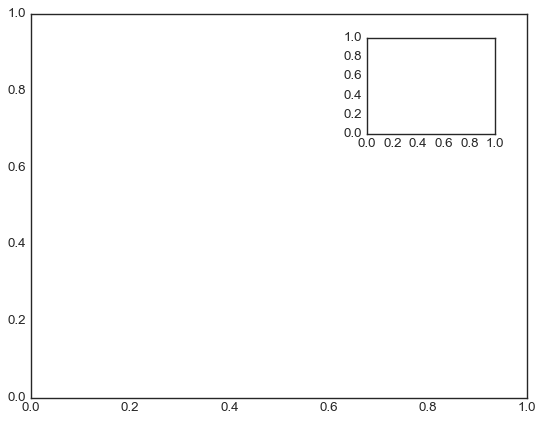

In [43]:
 # standard axes
ax1 = plt.axes()
ax2 = plt.axes([0.65,0.65,0.2,0.2])

The equivalent of this command within the object-oriented interface is ``fig.add_axes()``. Let's use this to create two vertically stacked axes:

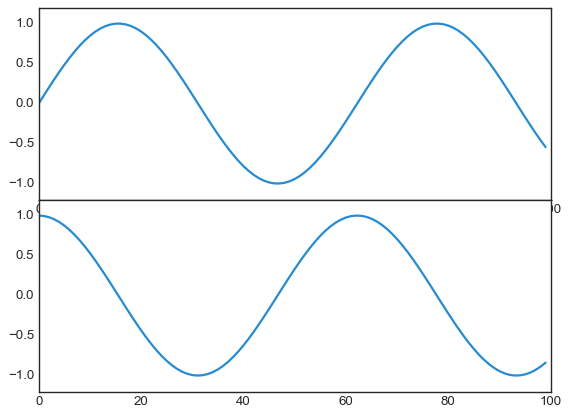

In [44]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1, 0.5, 0.8, 0.4], 
                   ylim = (-1.2,1.2))
ax2= fig1.add_axes([0.1, 0.1, 0.8, 0.4], 
                   ylim = (-1.2,1.2))

ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

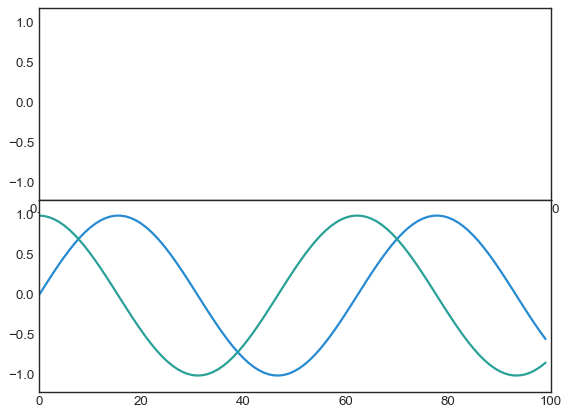

In [45]:
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1, 0.5, 0.8, 0.4], 
                   ylim = (-1.2,1.2))
ax2= fig1.add_axes([0.1, 0.1, 0.8, 0.4], 
                   ylim = (-1.2,1.2))

plt.plot(np.sin(x))
plt.plot(np.cos(x))

We now have two axes (the top with no tick labels) that are just touching: the bottom of the upper panel (at position 0.5) matches the top of the lower panel (at position 0.1 + 0.4).

## ``plt.subplot``: Simple Grids of Subplots

Aligned columns or rows of subplots are a common-enough need that Matplotlib has several convenience routines that make them easy to create.
The lowest level of these is ``plt.subplot()``, which creates a single subplot within a grid.
As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme, which runs from the upper left to the bottom right:

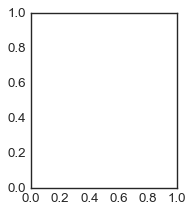

In [46]:
plt.subplot(2,3,1)

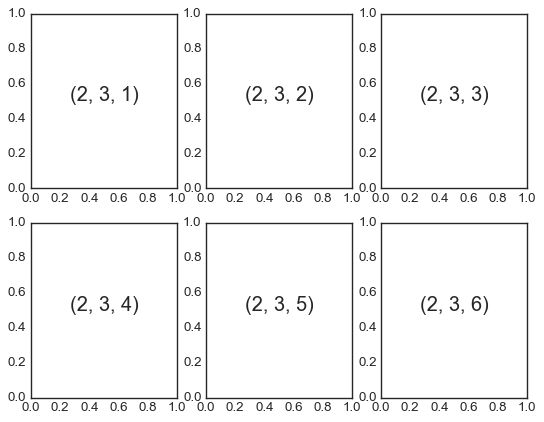

In [51]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5,str((2,3,i)),
    fontsize = 18, ha = "center")

The command ``plt.subplots_adjust`` can be used to adjust the spacing between these plots.
The following code uses the equivalent object-oriented command, ``fig.add_subplot()``:

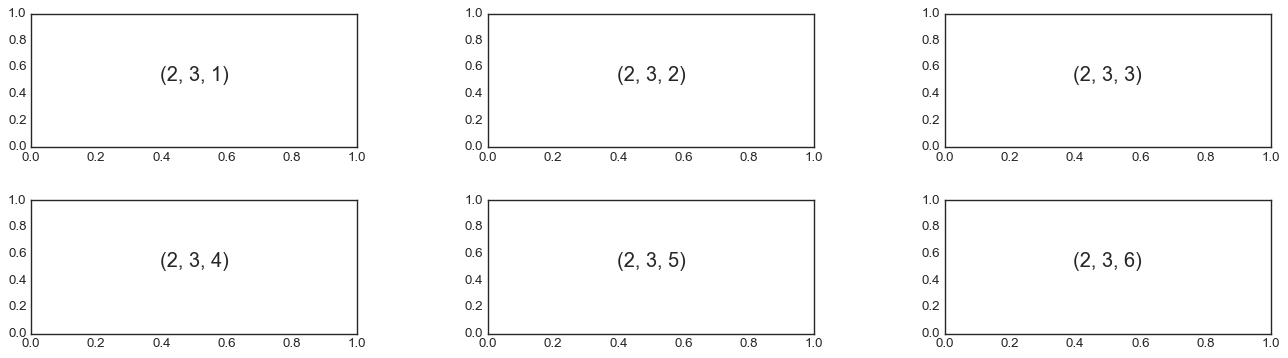

In [58]:
fig = plt.figure(figsize = (20,5))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5,str((2,3,i)),
           fontsize = 18, ha = "center")

We've used the ``hspace`` and ``wspace`` arguments of ``plt.subplots_adjust``, which specify the **spacing along the height and width of the figure**, in units of the subplot size (in this case, the space is 40% of the subplot width and height).

## ``plt.subplots``: The Whole Grid in One Go

**The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.**
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

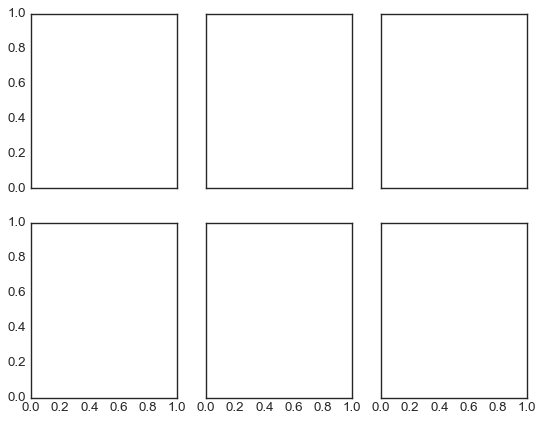

In [64]:
fig, ax = plt.subplots(2,3, sharex = "col", sharey = "row")

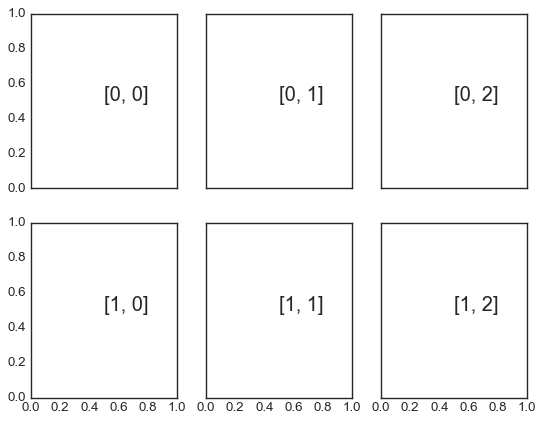

In [65]:
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str([i,j]), fontsize = 18, ha = "left")
fig

Note that by specifying ``sharex`` and ``sharey``, we've automatically removed inner labels on the grid to make the plot cleaner.
The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes using standard array indexing notation:

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]


In comparison to ``plt.subplot()``, ``plt.subplots()`` is more consistent with Python's conventional 0-based indexing.

# Simple Line Plots

Perhaps the simplest of all plots is the visualization of a single function $y = f(x)$.

Here we will take a first look at creating a simple plot of this type.

For all Matplotlib plots, we start by creating a figure and an axes.
In their simplest form, a figure and axes can be created as follows:

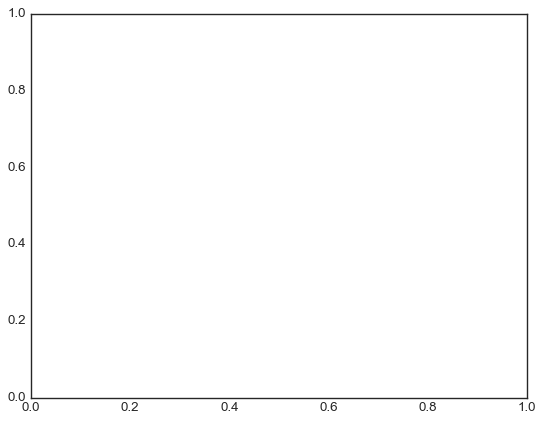

In [66]:
fig_lin = plt.figure()
fig_lin = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single **container that contains all the objects representing axes, graphics, text, and labels.**
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with **ticks and labels, which will eventually contain the plot elements that make up our visualization.**
Throughout this book, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

In [67]:
plt.clf()

<Figure size 640x480 with 0 Axes>

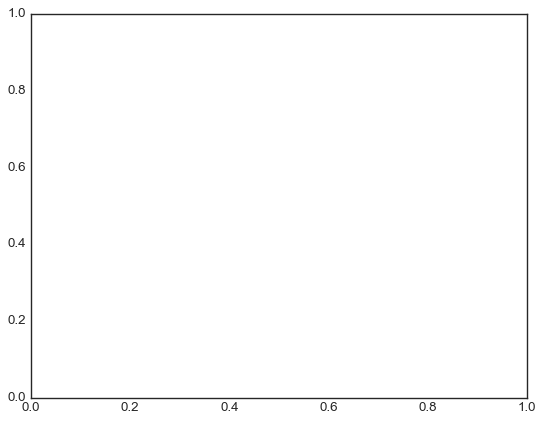

In [68]:
plt.cla()

In [69]:
ax_lin.plot(x,np.sin(x))

NameError: name 'ax_lin' is not defined

Alternatively, we can use the pylab interface and let the figure and axes be created for us in the background:

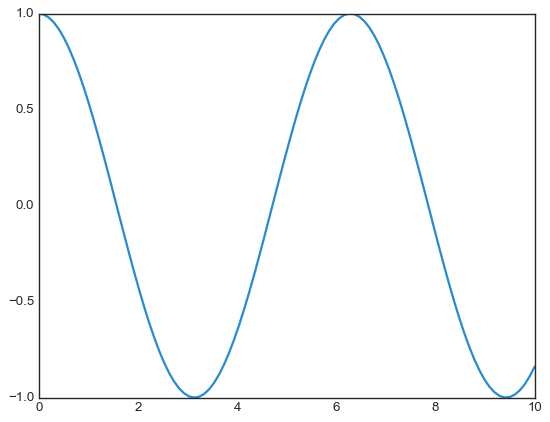

In [70]:
plt.plot(x, np.cos(x))

If we want to create a single figure with multiple lines, we can simply call the ``plot`` function multiple times:

That's all there is to plotting simple functions in Matplotlib!
We'll now dive into some more details about how to control the appearance of the axes and lines.

## Adjusting the Plot: Line Colors and Styles

The first adjustment you might wish to make to a plot is to control the line colors and styles.
The ``plt.plot()`` function takes additional arguments that can be used to specify these.
To adjust the color, you can use the ``color`` keyword, which accepts a string argument representing virtually any imaginable color.
The color can be specified in a variety of ways:

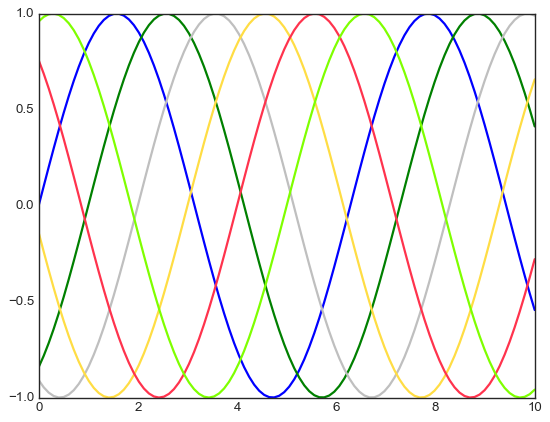

In [71]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

Similarly, the line style can be adjusted using the ``linestyle`` keyword:

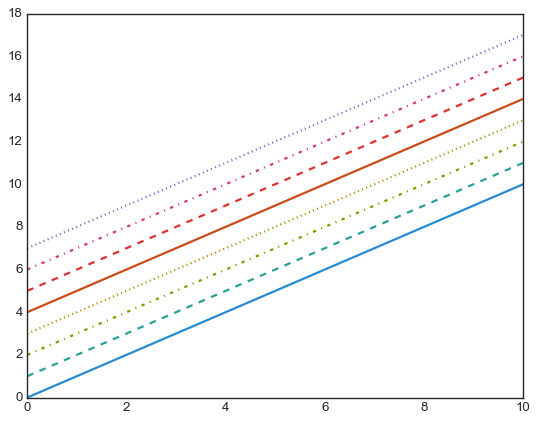

In [72]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

If you would like to be extremely terse, these ``linestyle`` and ``color`` codes can be combined into a single non-keyword argument to the ``plt.plot()`` function:

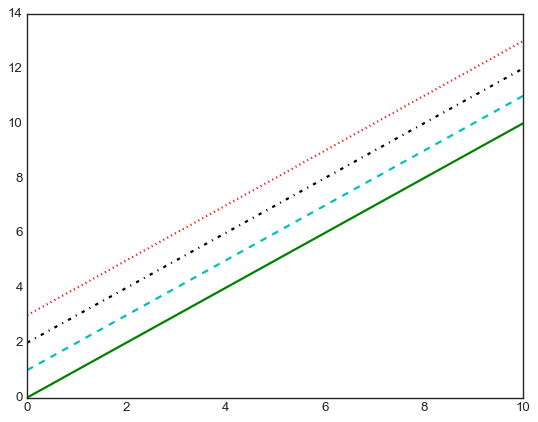

In [73]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red

These single-character color codes reflect the standard abbreviations in the RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK) color systems, commonly used for digital color graphics.

There are many other keyword arguments that can be used to fine-tune the appearance of the plot; for more details, I'd suggest viewing the docstring of the ``plt.plot()`` function using IPython's help tools.

## Adjusting the Plot: Axes Limits

Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control.
The most basic way to adjust axis limits is to use the ``plt.xlim()`` and ``plt.ylim()`` methods:

(-1.5, 1.5)

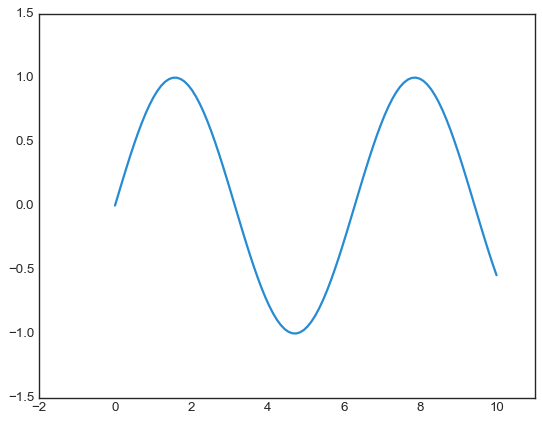

In [77]:
plt.plot(x,np.sin(x))
plt.xlim(-2,11)
plt.ylim(-1.5,1.5)

If for some reason you'd like either axis to be displayed in reverse, you can simply reverse the order of the arguments:

In [ ]:
#using flip

A useful related method is ``plt.axis()`` (note here the potential confusion between *axes* with an *e*, and *axis* with an *i*).
The ``plt.axis()`` method allows you to set the ``x`` and ``y`` limits with a single call, by passing a list which specifies ``[xmin, xmax, ymin, ymax]``:

(-2.0, 11.0, -1.5, 1.5)

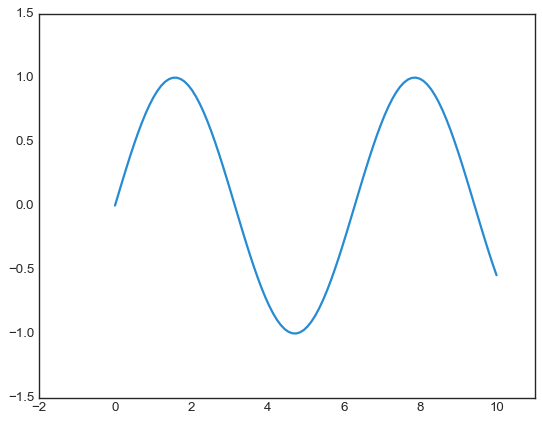

In [78]:
plt.plot(x,np.sin(x))
plt.axis([-2,11,-1.5,1.5])

The ``plt.axis()`` method goes even beyond this, allowing you to do things like automatically tighten the bounds around the current plot:

For more information on axis limits and the other capabilities of the ``plt.axis`` method, refer to the ``plt.axis`` docstring.

## Labeling Plots


As the last piece of this section, we'll briefly look at the labeling of plots: titles, axis labels, and simple legends.

Titles and axis labels are the simplest such labels—there are methods that can be used to quickly set them:

Text(0, 0.5, '$sin(x)$')

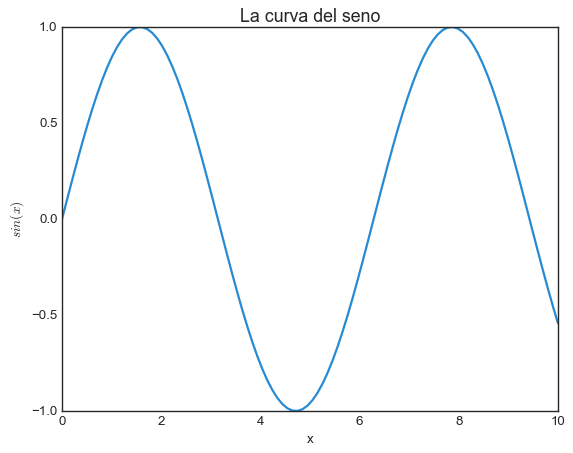

In [81]:
plt.plot(x,np.sin(x))
plt.title("La curva del seno")
plt.xlabel("x")
plt.ylabel("$sin(x)$")

**The position, size, and style of these labels can be adjusted using optional arguments to the function.**
For more information, see the Matplotlib documentation and the docstrings of each of these functions.

When multiple lines are being shown within a single axes, it can be useful to create a **plot legend** that labels each line type.
Again, **Matplotlib has a built-in way of quickly creating such a legend.**
It is done via the (you guessed it) ``plt.legend()`` method.
Though there are several valid ways of using this, I find it easiest to specify the label of each line using the ``label`` keyword of the plot function:

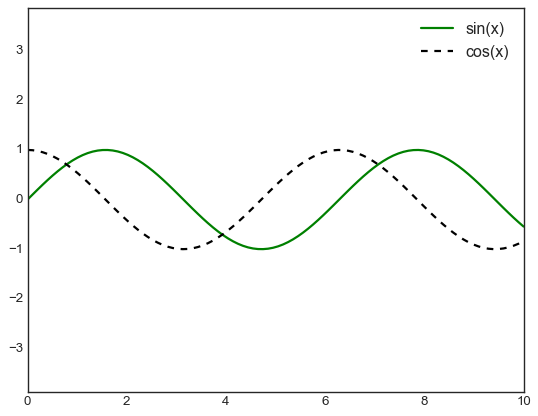

In [83]:
plt.plot(x,np.sin(x), "-g", label = "sin(x)")
plt.plot(x,np.cos(x), "--k", label = "cos(x)")

plt.axis("equal")
plt.legend()

As you can see, the ``plt.legend()`` function keeps track of the line style and color, and matches these with the correct label.
More information on specifying and formatting plot legends can be found in the ``plt.legend`` docstring.

## Aside: Matplotlib Gotchas


While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
**For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:**

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

[(-2.0, 2.0),
 Text(0, 0.5, 'sin(X)'),
 (0.0, 10.0),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'A simple plot')]

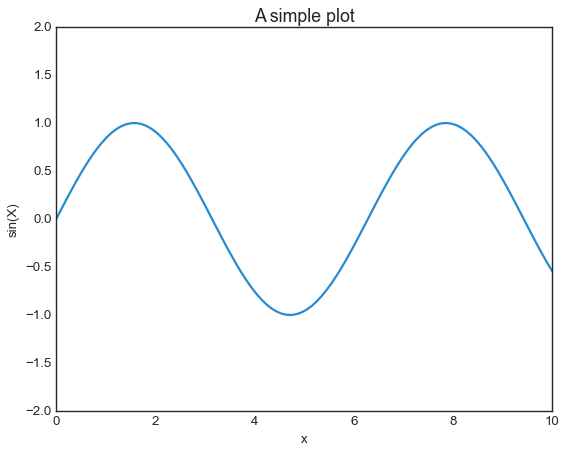

In [87]:
ax = plt.axes()
ax.plot(x,np.sin(x))
ax.set(xlim=(0,10), ylim = (-2,2), xlabel = "x", ylabel = "sin(X)", title = "A simple plot")

# Simple Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.

## Scatter Plots with ``plt.plot``

In the previous section we looked at ``plt.plot``/``ax.plot`` to produce line plots.
It turns out that this same function can produce scatter plots as well:

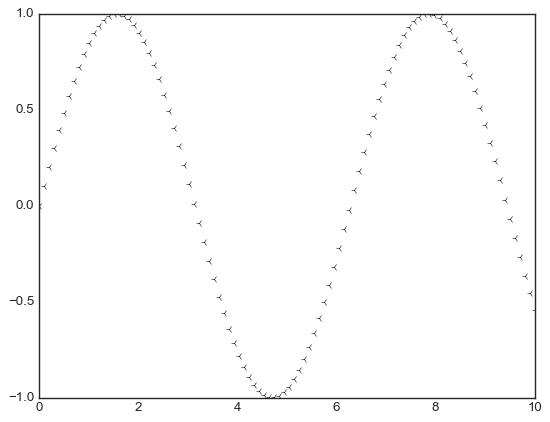

In [88]:
plt.plot(x,np.sin(x), "3", color ="black")

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as ``'-'``, ``'--'`` to control the line style, the marker style has its own set of short string codes. The full list of available symbols can be seen in the documentation of ``plt.plot``, or in Matplotlib's online documentation. Most of the possibilities are fairly intuitive, and we'll show a number of the more common ones here:

(0.0, 1.8)

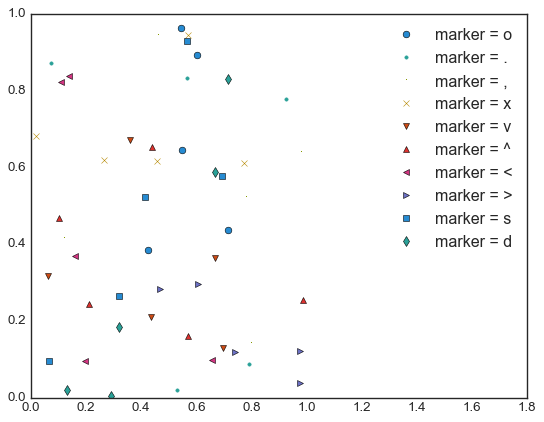

In [91]:
rng = np.random.RandomState(0)
for marker in ["o", ".", ",", "x", "v", "^", "<", ">", "s", "d"]:
    plt.plot(rng.rand(5), rng.rand(5), marker,
            label = f"marker = {marker}")
plt.legend()
plt.xlim(0,1.8)

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them:

In [97]:
x = np.linspace(0,10,20)

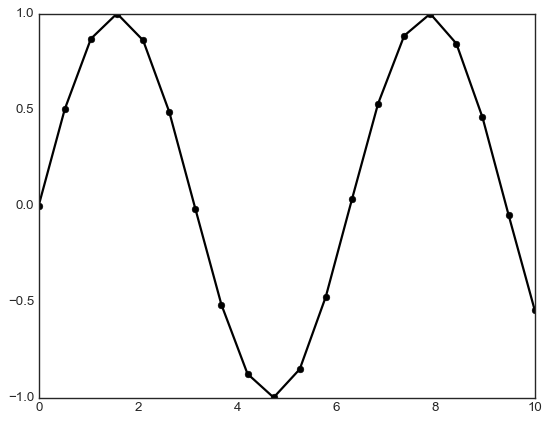

In [98]:
plt.plot(x, np.sin(x), "-ok")

Additional keyword arguments to ``plt.plot`` specify a wide range of properties of the lines and markers:

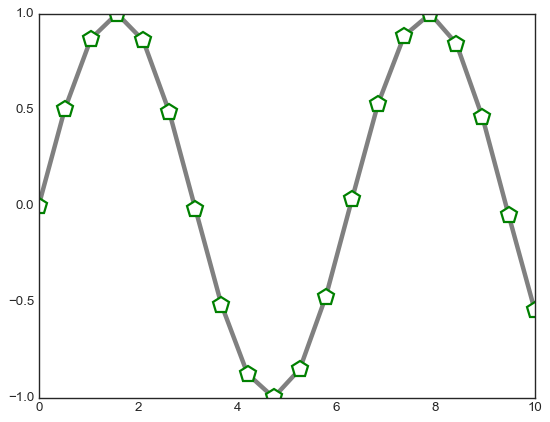

In [100]:
plt.plot(x, np.sin(x),"-p",
         color = "gray",
         markersize = 15,
         markerfacecolor = "white",
        markeredgecolor = "green", 
        markeredgewidth = 2,
        linewidth = 4)

This type of flexibility in the ``plt.plot`` function allows for a wide variety of possible visualization options.
For a full description of the options available, refer to the ``plt.plot`` documentation.

## Scatter Plots with ``plt.scatter``

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:

**The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.**

Let's show this by creating a random scatter plot with points of many colors and sizes.
In order to better see the overlapping results, we'll also use the ``alpha`` keyword to adjust the transparency level:

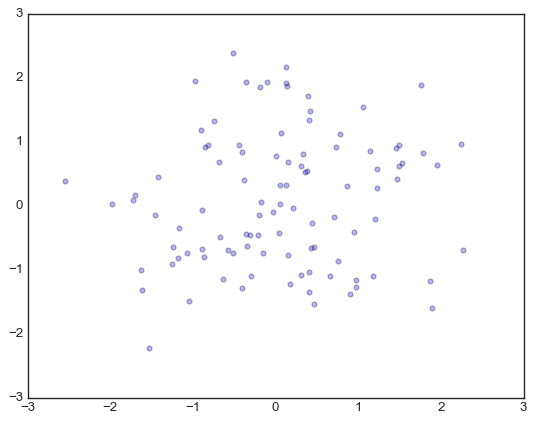

In [102]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)

plt.scatter(x,y,alpha = 0.3)

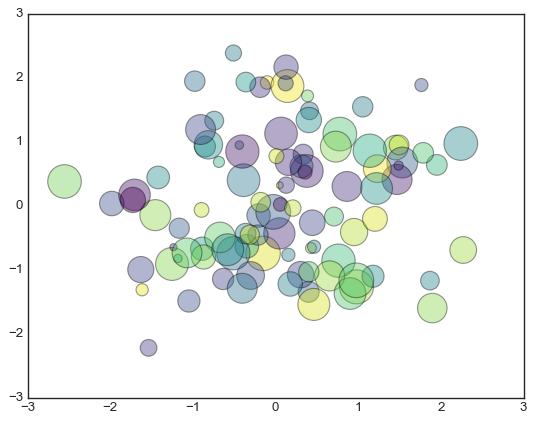

In [106]:
colors = rng.rand(100)
sizes = 1000*rng.rand(100)

plt.scatter(x,y,c=colors, s = sizes, alpha = 0.4, cmap= "viridis")

Notice that the color argument is automatically mapped to a color scale (shown here by the ``colorbar()`` command), and that the size argument is given in pixels.
In this way, the color and size of points can be used to convey information in the visualization, in order to visualize multidimensional data.

For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers that has had the size of its petals and sepals carefully measured:

In [107]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=bc52bf7925fd55139779a41f109912bb565b49d7e4b5215a967747479adc409d
  Stored in directory: /Users/erika/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [110]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
features = iris.data.T

Text(0, 0.5, 'sepal length (cm)')

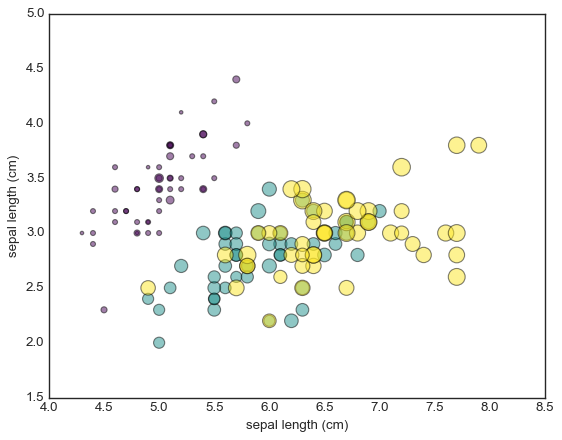

In [115]:

plt.scatter(features[0], features[1], alpha = 0.5, s = 100*features[3],c=iris.target, cmap ="viridis" )

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[0])


We can see that this scatter plot has given us the ability to **simultaneously explore four different dimensions of the data:**
the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower.
Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

# Histograms

A simple histogram can be a great first step in understanding a dataset.

(array([  8.,  33., 105., 194., 267., 211., 111.,  50.,  17.,   4.]),
 array([-3.04070476, -2.38946229, -1.73821981, -1.08697733, -0.43573485,
         0.21550763,  0.8667501 ,  1.51799258,  2.16923506,  2.82047754,
         3.47172002]),
 <a list of 10 Patch objects>)

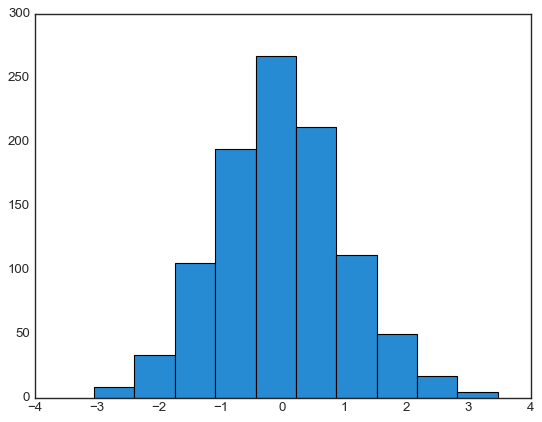

In [116]:
data = np.random.randn(1000)
plt.hist(data)

The ``hist()`` function has many options to tune both the calculation and the display; 
here's an example of a more customized histogram:

(array([ 1.,  4.,  3.,  5., 12., 16., 24., 38., 43., 63., 60., 71., 85.,
        95., 87., 84., 62., 65., 54., 31., 26., 19., 22.,  9.,  5.,  6.,
         6.,  1.,  2.,  1.]),
 array([-3.04070476e+00, -2.82362394e+00, -2.60654311e+00, -2.38946229e+00,
        -2.17238146e+00, -1.95530063e+00, -1.73821981e+00, -1.52113898e+00,
        -1.30405816e+00, -1.08697733e+00, -8.69896503e-01, -6.52815677e-01,
        -4.35734851e-01, -2.18654025e-01, -1.57319916e-03,  2.15507627e-01,
         4.32588453e-01,  6.49669279e-01,  8.66750105e-01,  1.08383093e+00,
         1.30091176e+00,  1.51799258e+00,  1.73507341e+00,  1.95215424e+00,
         2.16923506e+00,  2.38631589e+00,  2.60339671e+00,  2.82047754e+00,
         3.03755837e+00,  3.25463919e+00,  3.47172002e+00]),
 <a list of 30 Patch objects>)

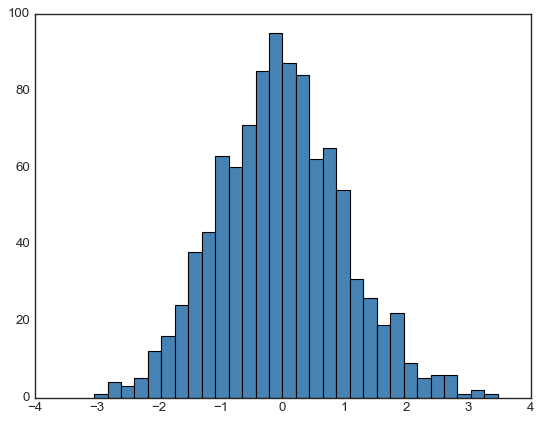

In [117]:
plt.hist(data,bins = 30, color="steelblue")

The ``plt.hist`` docstring has more information on other customization options available.
Transparency ``alpha`` is very useful when comparing histograms of several distributions:

(array([ 1.,  1.,  0.,  4.,  2.,  4.,  6.,  6., 13.,  4., 18., 13., 25.,
        23., 41., 46., 61., 51., 50., 57., 50., 56., 53., 61., 62., 59.,
        48., 38., 29., 23., 24., 18., 13., 11.,  4., 10.,  6.,  4.,  2.,
         3.]),
 array([-3.67547829, -3.36265868, -3.04983907, -2.73701946, -2.42419984,
        -2.11138023, -1.79856062, -1.48574101, -1.1729214 , -0.86010179,
        -0.54728218, -0.23446256,  0.07835705,  0.39117666,  0.70399627,
         1.01681588,  1.32963549,  1.64245511,  1.95527472,  2.26809433,
         2.58091394,  2.89373355,  3.20655316,  3.51937277,  3.83219239,
         4.145012  ,  4.45783161,  4.77065122,  5.08347083,  5.39629044,
         5.70911006,  6.02192967,  6.33474928,  6.64756889,  6.9603885 ,
         7.27320811,  7.58602772,  7.89884734,  8.21166695,  8.52448656,
         8.83730617]),
 <a list of 40 Patch objects>)

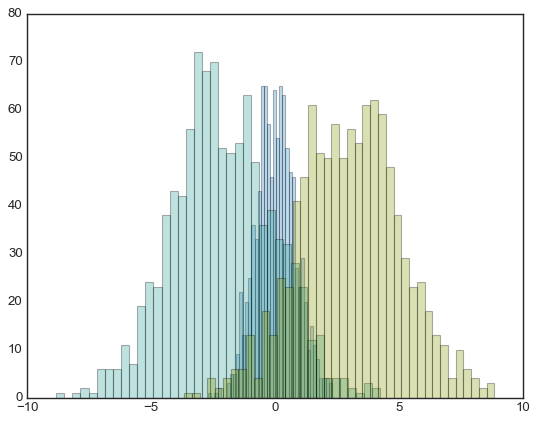

In [119]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,2,1000)
x3 = np.random.normal(3,2,1000)

kwargs = dict(histtype = "bar", alpha = 0.3, bins = 40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)


# Ejemplo

Text(3, 600.0, 'Vendimos muchos tomates')

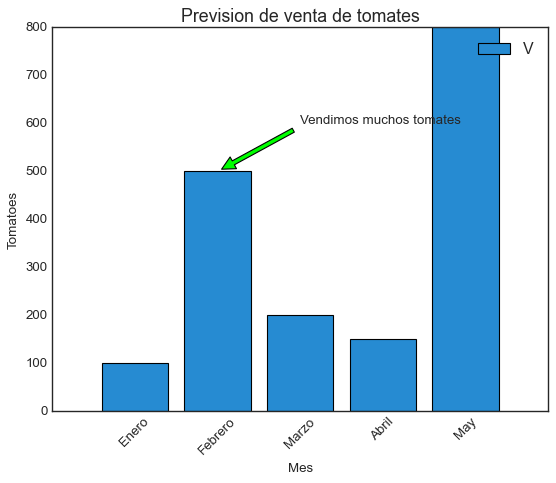

In [156]:
# industria del tomate

ventas = [100,500,200,150,800]
meses= [1,2,3,4,5]
plt.bar(meses,ventas)
plt.ylabel("Tomatoes")
plt.xlabel("Mes")
plt.xticks(meses,labels = ("Enero", "Febrero", "Marzo", "Abril","May"), rotation = 45)
plt.legend("Venta tomates mes")
plt.title("Prevision de venta de tomates")

plt.annotate("Vendimos muchos tomates", xy = (2,ventas[1]), xytext=(3,ventas[1]*1.2), 
             arrowprops = dict(facecolor  ="#00FF00", shrink = 0.05))